# MNIST DATASET - HANDWRITTEN DIGITS RECOGNITION

### This is a famous dataset used for hand written digits recognition
We have no need to perform a train test split , since this data set is already pre defined and
pre separated  for our needs..

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt

In [69]:
from tensorflow.keras.datasets import mnist

In [70]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [71]:
print(x_train.shape)

(60000, 28, 28)


In [72]:
print(y_train.shape)

(60000,)


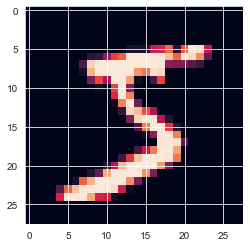

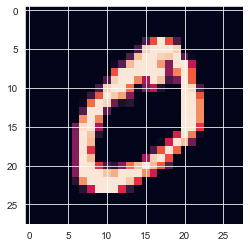

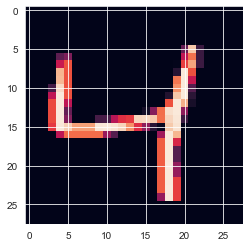

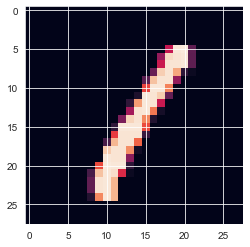

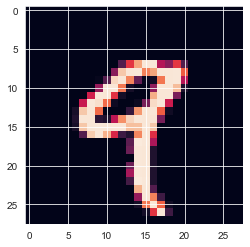

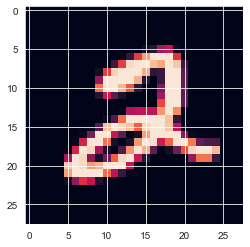

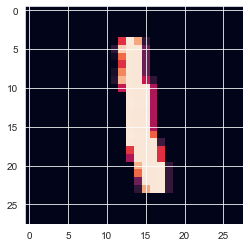

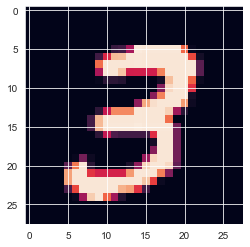

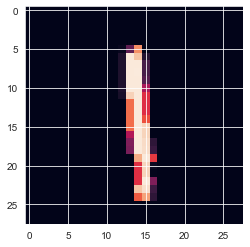

In [73]:
for x in range(0,9):
    plt.imshow(x_train[x].reshape(28,28))
    plt.show()

In [74]:
#Let us select a single image and perform some analysis :

In [75]:
single_image = x_train[0]

In [76]:
print(single_image)    #Array , pixel version :

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [77]:
print(single_image.shape)

(28, 28)


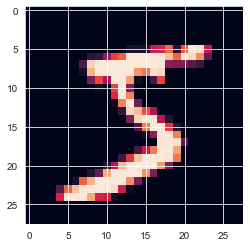

In [78]:
plt.imshow(single_image)
plt.show()

In [79]:
print(y_train)

[5 0 4 ... 5 6 8]


In [80]:
print(y_train[0])

5



 <br>
As you can see ,  the first x train plot was five , and its corresponding first  y label was also 5 , so <br>
the x set denotes all the images form 0 to 9 digits in array , matrix format consisting of pixel values as image<br>
kernels..<br>
On the other hand , y set consist of labels , their actual predictions..<br>
Now we will have to perform one hot label encoding , since the y set needs to be a simple binary value , instead of known<br>
label value..this will help to convert  a label to a category..<br>


In [81]:
from tensorflow.keras.utils import to_categorical

In [82]:
y_cat_test = to_categorical(y_test)
y_cat_train = to_categorical(y_train)

In [83]:
print(y_cat_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


## Scaling Of Data :


 <br>
Now we have to scale our data to prevent any gradient problem to one scale ,between 0 to 1<br>


In [84]:
print(single_image.max())

255


In [85]:
print(single_image.min())

0


In [86]:
x_train = x_train / 255

In [87]:
x_test = x_test / 255

In [88]:
scaled_image = x_train[0]

In [89]:
print(scaled_image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [90]:
print(scaled_image.max())

1.0


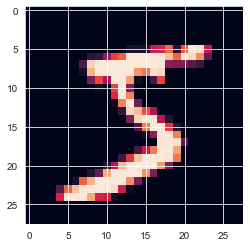

In [91]:
plt.imshow(scaled_image)
plt.show()


 <br>
Since the ratio of scaled data in scaled image array is same, it will show the same image as usual<br>
Notice , we can see the data has been scaled now and all matrix or kernel values lie between 0 to 1<br>
Now, we have to reshape our array to let our convolutional neural network know that we are dealing with<br>
single colur channel , grayscale..<br>


For training set<br>
batch size = 60000 samples<br>
height = 28 px<br>
width =28 px<br>
colour channel = 1

In [92]:
x_train = x_train.reshape(60000, 28, 28, 1)

For testing set<br>
batch size = 60000 samples<br>
height = 28 px<br>
width =28 px<br>
colour channel = 1

In [93]:
x_test = x_test.reshape(10000, 28, 28, 1)

## Building A CNN Model :

In [94]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [95]:
model = Sequential()

In [96]:
model.add(Conv2D(filters=32, kernel_size=(4, 4),
                 input_shape=(28, 28, 1), activation='relu'))

In [97]:
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())

In [98]:
#OUTPUT LAYER : For Multi Class Classification : between 0 to 9 digits class :-->

In [99]:
model.add(Dense(10, activation='softmax'))

In [100]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
from tensorflow.keras.callbacks import EarlyStopping

In [102]:
early_Stop = EarlyStopping(monitor='val_loss', patience=1)

In [103]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_Stop])

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2065 - accuracy: 0.9405 - val_loss: 0.0792 - val_accuracy: 0.9760
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0744 - accuracy: 0.9778 - val_loss: 0.0576 - val_accuracy: 0.9802
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0543 - accuracy: 0.9837 - val_loss: 0.0501 - val_accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0433 - accuracy: 0.9872 - val_loss: 0.0499 - val_accuracy: 0.9838
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0364 - accuracy: 0.9888 - val_loss: 0.0501 - val_accuracy: 0.9838


## Model Performance :

In [104]:
metrics = pd.DataFrame(model.history.history)

In [105]:
print(metrics.head())

       loss  accuracy  val_loss  val_accuracy
0  0.206480  0.940500  0.079214        0.9760
1  0.074380  0.977833  0.057644        0.9802
2  0.054298  0.983683  0.050087        0.9839
3  0.043277  0.987183  0.049902        0.9838
4  0.036440  0.988833  0.050057        0.9838


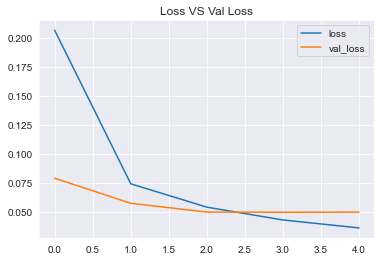

In [106]:
sns.set_style('darkgrid')
metrics[['loss', 'val_loss']].plot()
plt.title('Loss VS Val Loss')
plt.show()

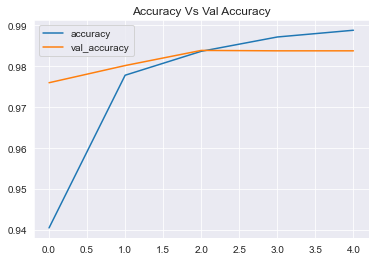

In [107]:
sns.set_style('darkgrid')
metrics[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy Vs Val Accuracy')
plt.show()

In [108]:
print(model.metrics_names)

['loss', 'accuracy']



 <br>
The first evaluation will be of loss ,<br>
The second evaluation will be of accuracy  --><br>


In [109]:
print("The loss and accuracy respectively are : ", model.evaluate(x_test, y_cat_test))

313/313 [==============================] - 2s 7ms/step - loss: 0.0501 - accuracy: 0.9838
The loss and accuracy respectively are :  [0.05005654692649841, 0.9837999939918518]


In [110]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Predictions :

In [111]:
predictions = model.predict_classes(x_test)
print(predictions)

[7 2 1 ... 4 5 6]


In [112]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [113]:
print(y_test.shape)

(10000,)


In [114]:
print(y_cat_test.shape)

(10000, 10)


In [115]:
comp_df = pd.DataFrame({'Actual Label': y_test, 'Predicted Label ': predictions})
print(comp_df.head(20))

    Actual Label  Predicted Label 
0              7                 7
1              2                 2
2              1                 1
3              0                 0
4              4                 4
5              1                 1
6              4                 4
7              9                 9
8              5                 5
9              9                 9
10             0                 0
11             6                 6
12             9                 9
13             0                 0
14             1                 1
15             5                 5
16             9                 9
17             7                 7
18             3                 3
19             4                 4


In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [117]:
print('The Accuracy Is :',round(accuracy_score(y_test,predictions),2))

The Accuracy Is : 0.98


In [118]:
print(confusion_matrix(y_test, predictions))

[[ 972    1    2    1    0    1    1    0    1    1]
 [   0 1133    0    1    0    0    1    0    0    0]
 [   2    5 1001   10    1    0    1   11    0    1]
 [   1    0    0 1003    0    2    0    2    1    1]
 [   0    0    0    0  976    0    1    0    0    5]
 [   2    0    0    9    0  879    1    0    0    1]
 [   6    2    0    0    2    4  943    0    1    0]
 [   0    2    6    3    1    0    0 1013    2    1]
 [   6    1    4    5    4    4    2    7  937    4]
 [   0    3    0    4   10    4    0    6    1  981]]


### LET US Detect a random image to see our model's performance :


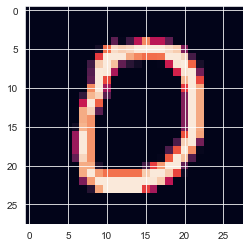

In [119]:
samp_img = x_test[10]
plt.imshow(samp_img.reshape(28, 28))
plt.show()


 <br>
We have to reshape our input of new random data :<br>
number of images , height,width,number of colour channels --><br>
1,28,28,1<br>


In [120]:
pred2 = model.predict_classes(samp_img.reshape(1, 28, 28, 1))
print("The predicted Result of image is : ", pred2)

The predicted Result of image is :  [0]
